In [4]:
# Import some modules which we will use later

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [43]:
# Define custom function

def euclidean_dist(x,y):
    """Calculates Euclidean distance between 2 n-dimensional vectors"""
    temp = x-y
    temp_2 = temp**2
    temp_sum = sum(temp_2)
    temp_sqrt = math.sqrt(temp_sum)
    
    return temp_sqrt


def adjacency_matrix(X):
    n = X.shape[0]
    dist_matrix = np.zeros((n, n))
    for i in range(0,n):
        for j in range(i+1,n):
            dist_matrix[i,j]=euclidean_dist(np.array(X.iloc[i,]),np.array(X.iloc[j,]))
            
    return dist_matrix


def benchmark_data_generation(n,p,K):
    from sklearn.datasets.samples_generator import make_blobs
    X, y = make_blobs(n_samples=n, centers=K, n_features = p,
                  random_state=0, cluster_std=1.5)
    
    return X, y

def edge_vector(dist_matrix):
    
    n=len(dist_matrix)
    n_rows = int(n*(n-1)*(0.5))
    edge_dist = np.zeros((n_rows, 3))
    
    counter = 0
    
    for i in range(0,n):
        for j in range(i+1,n):
            
            edge_dist[counter,0] = i
            edge_dist[counter,1] = j
            edge_dist[counter,2] = dist_matrix[i,j]
            counter += 1
            
    return edge_dist

def edge_sorting(edge_vector):
    sorted_matrix = edge_vector[edge_vector[:, -1].argsort()]
    
    return sorted_matrix
    

In [6]:
# Test the custom function

x = np.array([1,2,3])
y = np.array([1,1,1])

print(euclidean_dist(x,y))

2.23606797749979


100
0.007433008823961671
      point_1  point_2  distance
2750     33.0     45.0  0.007433


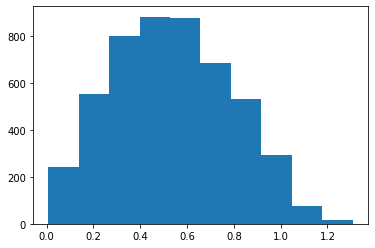

      index  point_1  point_2  distance
0       881      9.0     36.0  1.307620
1       898      9.0     53.0  1.279314
2       900      9.0     55.0  1.260842
3       133      1.0     36.0  1.255470
4       873      9.0     28.0  1.251552
...     ...      ...      ...       ...
4945   4180     60.0     71.0  0.017700
4946   3161     39.0     81.0  0.017219
4947   3688     49.0     63.0  0.016852
4948   2261     26.0     39.0  0.009840
4949   2750     33.0     45.0  0.007433

[4950 rows x 4 columns]


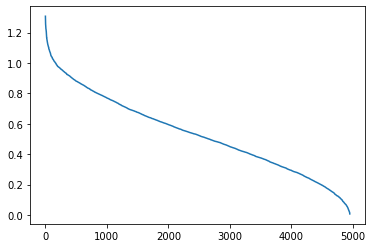

In [7]:
# Quick and dirty check for finding the 2 closest points

points = np.random.rand(100,2)

print(len(points))
#print(points)

results = np.random.rand(1,3)

for i in range(0,len(points)):
    for j in range(i+1,len(points)):
        dist = np.linalg.norm(points[i,:]-points[j,:])
        temp = np.array([i,j,dist]).reshape(1,3)
        #print(temp.shape)
        #print(results.shape)
        results = np.vstack((results,temp))

results = results[1:,:]        
#print(results)
print(min(results[:,2]))
a = min(results[:,2])


results = pd.DataFrame(results)
results.columns = ['point_1','point_2','distance']
#print(results.columns)

# Get the closest point
print(results[results['distance']<=a])


# Plot histogram of distance
plt.hist(results['distance'])
plt.show()

# Distance-sorted array
sorted_results = results.sort_values(by=['distance'],ascending=False).reset_index()
print(sorted_results)
plt.plot(sorted_results['distance'])
plt.show()

In [13]:
# Benchmark data generation
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=60, centers=3,n_features = 2,
                  random_state=0, cluster_std=1.5)

In [19]:
X = pd.DataFrame(X)
print(X.shape[0])

60


In [15]:
dist_matrix = np.zeros((len(y), len(y)))

In [16]:
for i in range(0,len(y)):
    for j in range(i+1,len(y)):
        dist_matrix[i,j]=euclidean_dist(np.array(X.iloc[i,]),np.array(X.iloc[j,]))

In [17]:
print(dist_matrix)

[[0.         2.29411286 2.77265618 ... 2.87803244 3.27283267 4.11132773]
 [0.         0.         0.82441207 ... 1.66423774 5.47558386 3.58764408]
 [0.         0.         0.         ... 0.98719066 5.74487791 4.35758644]
 ...
 [0.         0.         0.         ... 0.         5.42328315 5.25087635]
 [0.         0.         0.         ... 0.         0.         6.95861783]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
temp = adjacency_matrix(X)
print(len(temp))

60


In [28]:
X1, y1 = benchmark_data_generation(n=60,p=4,K=3)


In [42]:
temp_vector = edge_vector(temp)
print(len(temp_vector))
print(temp_vector[21,:])

1770
[ 0.         22.          0.22695916]


In [45]:
sorted_list = edge_sorting(temp_vector)
print(len(sorted_list))

1770


[[ 0.          1.          2.29411286]
 [ 0.          2.          2.77265618]
 [ 0.          1.37639628  3.        ]
 ...
 [ 5.42328315 57.         58.        ]
 [ 5.25087635 57.         59.        ]
 [ 6.95861783 58.         59.        ]]
